# Explore here

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
import pickle

#### LECTURA DEL DATA SET

In [4]:
df = pd.read_csv(r"C:\Users\emili\OneDrive\Documentos\GitHub\Flask-Emiliano0041\data\raw\synthetic_liver_cancer_dataset.csv")
df

,age,gender,bmi,alcohol_consumption,smoking_status,hepatitis_b,hepatitis_c,liver_function_score,alpha_fetoprotein_level,cirrhosis_history,family_history_cancer,physical_activity_level,diabetes,liver_cancer
0,68,Female,18.1,Regular,Former,0,0,51.9,16.44,0,0,Low,0,0
1,81,Female,19.9,Occasional,Never,0,0,41.6,8.09,0,0,Moderate,1,0
2,58,Female,25.5,Never,Never,0,0,76.0,0.64,0,0,Moderate,0,0
3,44,Male,16.0,Never,Former,0,0,50.3,19.09,0,0,Low,1,0
4,72,Male,21.0,Occasional,Former,0,0,39.5,4.95,1,0,Low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,32,Male,20.1,Regular,Never,0,0,68.2,6.73,1,0,Moderate,0,0
4996,80,Male,16.9,Never,Never,1,0,80.2,44.66,0,0,Low,0,0
4997,51,Female,23.1,Occasional,Never,0,0,65.7,7.64,0,1,Low,0,0
4998,76,Female,26.4,Never,Never,0,1,26.4,6.15,0,0,Low,0,0


#### EDA

- Un poco de informacion sobre nuestro data set

In [16]:
df.shape

(5000, 14)

In [5]:
df.columns

Index(['age', 'gender', 'bmi', 'alcohol_consumption', 'smoking_status',
       'hepatitis_b', 'hepatitis_c', 'liver_function_score',
       'alpha_fetoprotein_level', 'cirrhosis_history', 'family_history_cancer',
       'physical_activity_level', 'diabetes', 'liver_cancer'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      5000 non-null   int64  
 1   gender                   5000 non-null   object 
 2   bmi                      5000 non-null   float64
 3   alcohol_consumption      5000 non-null   object 
 4   smoking_status           5000 non-null   object 
 5   hepatitis_b              5000 non-null   int64  
 6   hepatitis_c              5000 non-null   int64  
 7   liver_function_score     5000 non-null   float64
 8   alpha_fetoprotein_level  5000 non-null   float64
 9   cirrhosis_history        5000 non-null   int64  
 10  family_history_cancer    5000 non-null   int64  
 11  physical_activity_level  5000 non-null   object 
 12  diabetes                 5000 non-null   int64  
 13  liver_cancer             5000 non-null   int64  
dtypes: float64(3), int64(7),

In [8]:
df["alcohol_consumption"].value_counts()

alcohol_consumption
Never         2014
Occasional    1967
Regular       1019
Name: count, dtype: int64

In [9]:
df["smoking_status"].value_counts()

smoking_status
Never      2407
Former     1568
Current    1025
Name: count, dtype: int64

In [10]:
df["physical_activity_level"].value_counts()

physical_activity_level
Moderate    2027
Low         1957
High        1016
Name: count, dtype: int64

In [15]:
df.duplicated().sum()

np.int64(0)

In [17]:
df["liver_cancer"].value_counts()

liver_cancer
0    3911
1    1089
Name: count, dtype: int64

------

#### GRAFICOS

- De barras


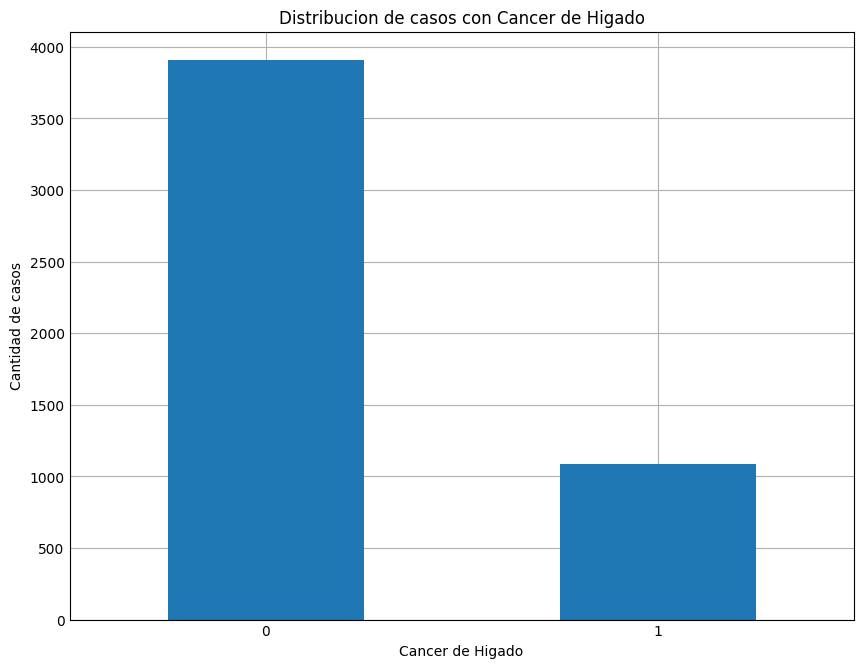

In [19]:
plt.style.use("_mpl-gallery")

plt.figure(figsize=(8,6))
df["liver_cancer"].value_counts().plot(kind="bar")
plt.title("Distribucion de casos con Cancer de Higado")
plt.xlabel("Cancer de Higado")
plt.ylabel("Cantidad de casos")
plt.xticks(rotation=0)
plt.show()

- Vemos que la distrubucion de las clases es realista, pero desbalanceada para el modelo.

-----

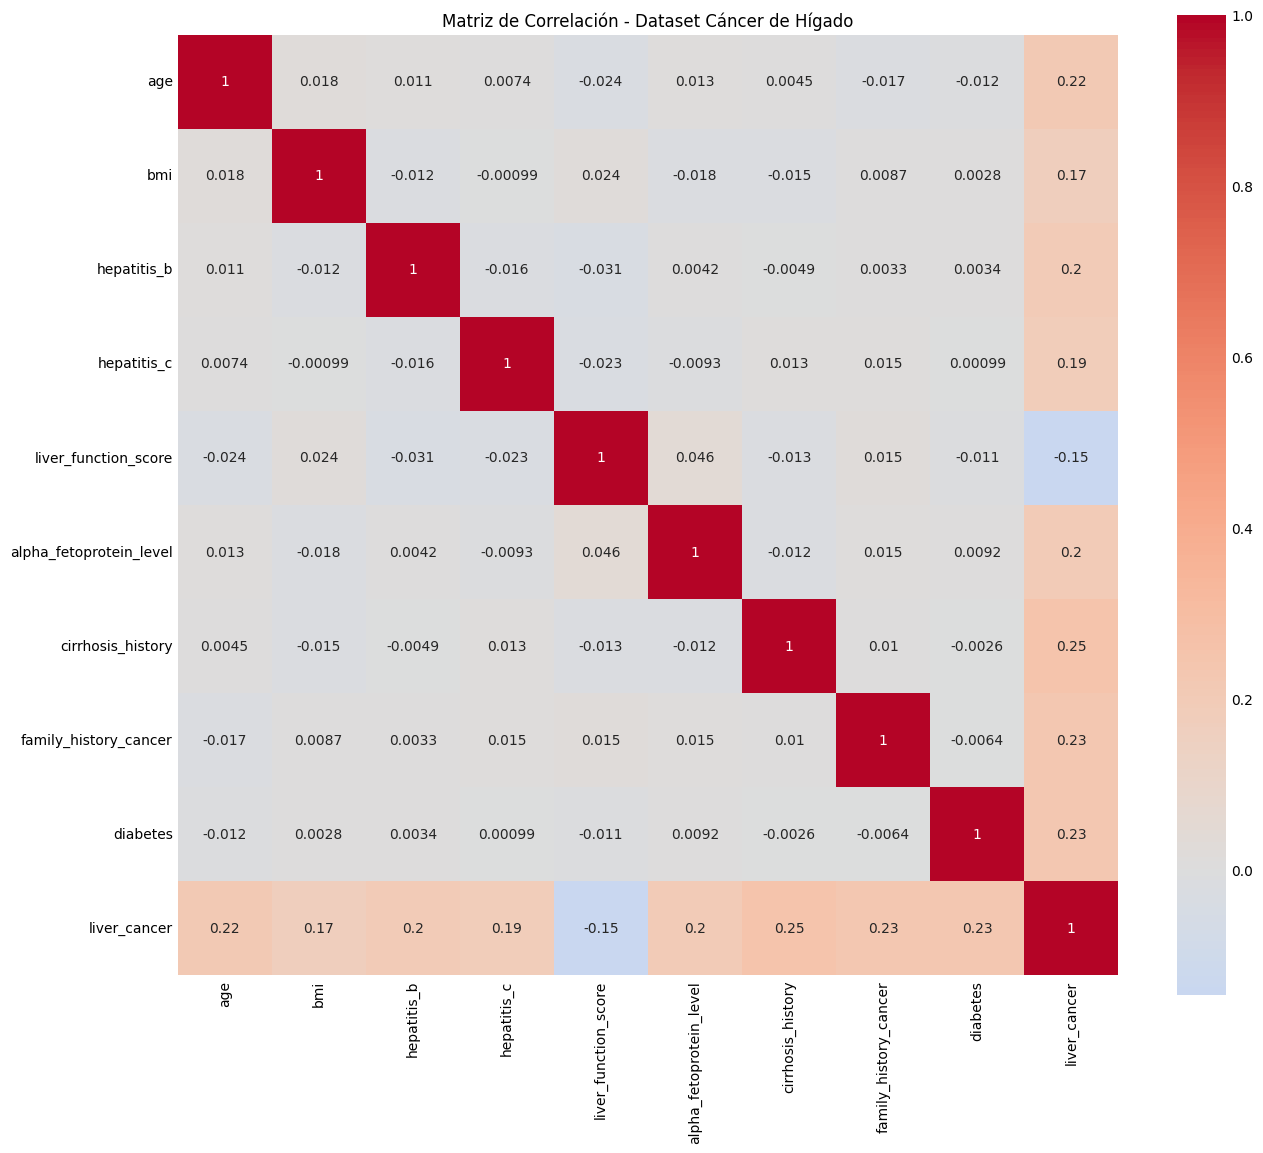

In [25]:

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

correlation_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,           # Mostrar los números
            cmap='coolwarm',      # Colores (azul-rojo)
            center=0,             # Centrar en 0
            square=True)          # Hacer cuadrados
plt.title('Matriz de Correlación - Dataset Cáncer de Hígado')
plt.show()

- Podemos ver que todas las variables tienen una correlacion algo relevante con la variable objetivo

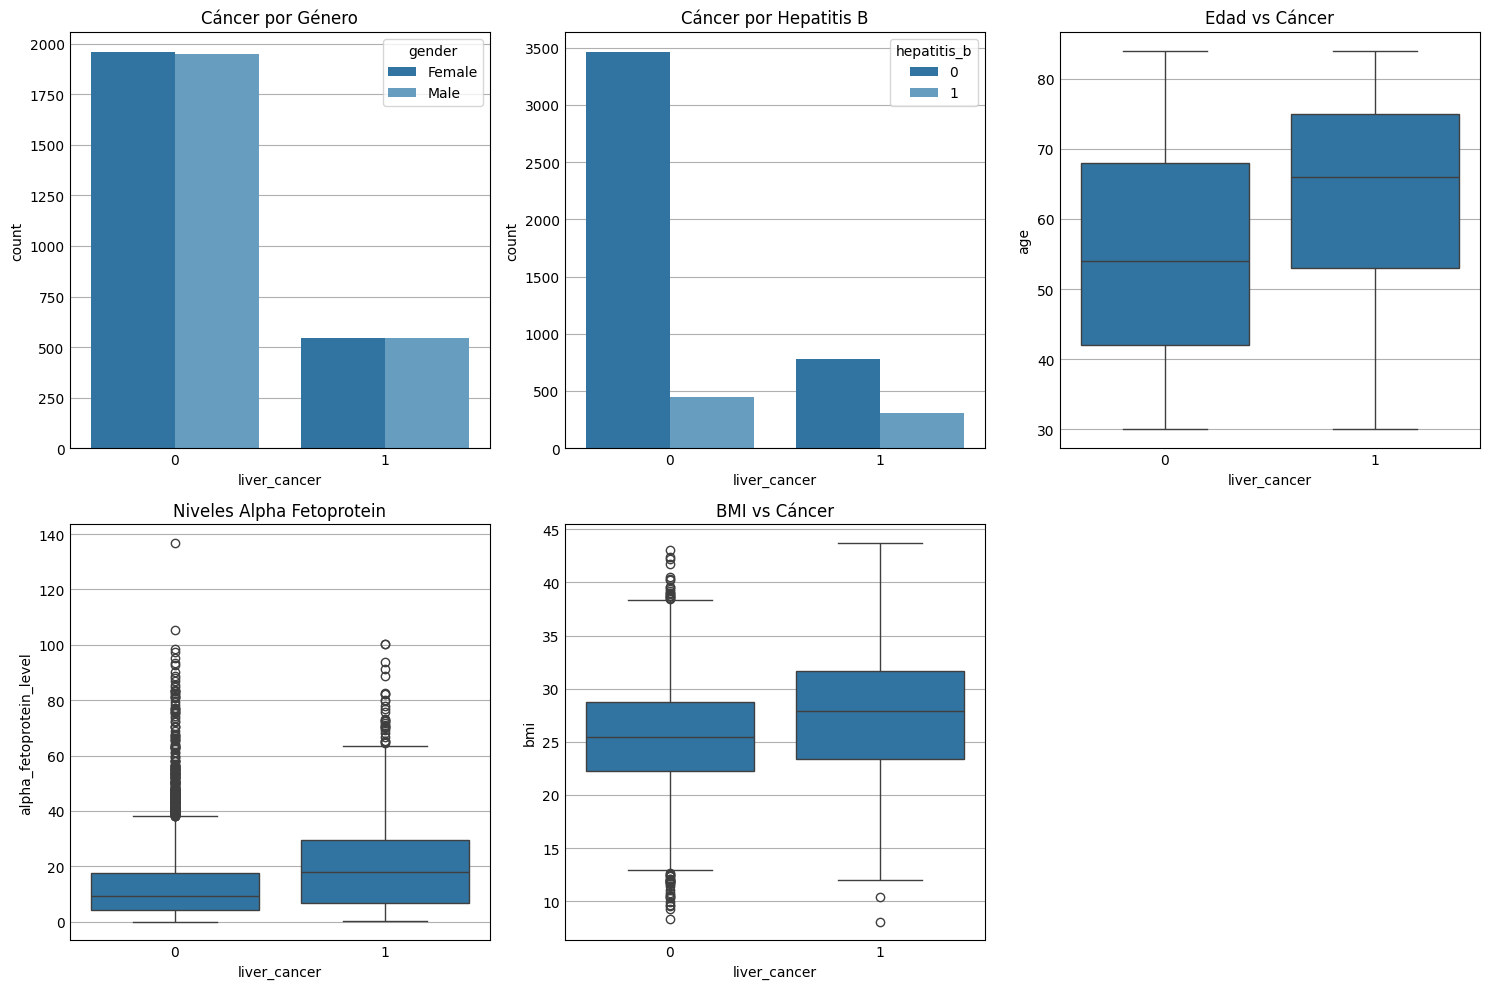

In [27]:
plt.figure(figsize=(15, 10))

# Subplot 1: Distribución por género
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='liver_cancer', hue='gender')
plt.title('Cáncer por Género')

# Subplot 2: Distribución por hepatitis B
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='liver_cancer', hue='hepatitis_b')
plt.title('Cáncer por Hepatitis B')

# Subplot 3: Distribución por edad
plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='liver_cancer', y='age')
plt.title('Edad vs Cáncer')

# Subplot 4: Alpha fetoprotein levels
plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='liver_cancer', y='alpha_fetoprotein_level')
plt.title('Niveles Alpha Fetoprotein')

# Subplot 5: BMI distribution
plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='liver_cancer', y='bmi')
plt.title('BMI vs Cáncer')



plt.tight_layout()
plt.show()

- Algunos graficos para analizar bien nuestros datos 


------

#### MODELO

- Utilizare un LightGBM

- Split

In [37]:
categorical_cols = ['gender', 'alcohol_consumption', 'smoking_status', 'physical_activity_level']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [38]:
X = df.drop('liver_cancer', axis=1)
y = df['liver_cancer']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                   random_state=42, stratify=y)

model = lgb.LGBMClassifier(random_state=42, 
                          class_weight='balanced',  # Para tu problema de recall
                          n_estimators=100)






- Modelo

In [39]:
model = lgb.LGBMClassifier(random_state=42, 
                          class_weight='balanced',  # Para tu problema de recall
                          n_estimators=100)


- Training

In [40]:
model.fit(X_train, y_train, 
          categorical_feature=categorical_features)


[LightGBM] [Info] Number of positive: 871, number of negative: 3129
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0,000503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 842
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0,500000 -> initscore=-0,000000
[LightGBM] [Info] Start training from score -0,000000


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


- Predicciones

In [41]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       782
           1       0.94      0.96      0.95       218

    accuracy                           0.98      1000
   macro avg       0.97      0.97      0.97      1000
weighted avg       0.98      0.98      0.98      1000



#### GUARDADO

In [43]:
with open ("model_lightgbm", "wb") as file:
    pickle.dump(model, file)

In [44]:
with open('label_encoders.pkl', 'wb') as f:
    pickle.dump(le, f)